# Theoretical hotspot propensity in EV Fig 2B

In [1]:
import os
from collections import defaultdict
import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
sigs_color = {
'SBS1': '#1e79baff',
 'SBS2': '#ff9896ff',
 'SBS3': '#f6c200ff', 
 'SBS4': '#00a572ff', 
 'SBS5': '#7ebdeaff',
 'SBS7a': '#8c564bff', 
 'SBS7b': '#c49c94ff',
 'SBS8': '#3dbe3dff',
 'SBS13': '#d62728ff',
 'SBS17a': '#ffbb78ff',
 'SBS17b': '#ff8921ff', 
 'SBS18': '#9467bdff',
 'SBS40': '#c2e0f5ff',
 'SBS93': '#c5b0d5ff',
}

In [4]:
data_dir = '../../../data/expected_hotspot_propensity'

### Load data

JSON file containing expected (theoretical) hotspot propensity. This expected was computed using the model of homogeneous distribution of trinucleotide-specific mutation rates with 300 mutations/sample and 100 samples across mappable megabases. 

In [5]:
# Expected hotspot propensity
theoretical_propensity_f = f'{data_dir}/expected_hotspots_genomewide_disallowed_mutspermb.json'
with open(theoretical_propensity_f, 'r') as fd: 
    theoretical_propensity_data = json.load(fd)

In [6]:
# Reformat into a dictionary for easy access
theoretical_propensity_d = defaultdict(lambda: defaultdict(dict))
for element in theoretical_propensity_data: 
    muts, sig, samples, hotspots = element
    if str(samples)[-2] == '0': 
        theoretical_propensity_d[muts][sig][samples] = hotspots

## Panel EV2B

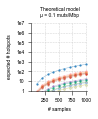

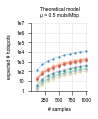

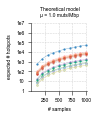

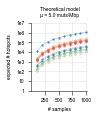

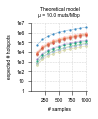

In [7]:
for sample_muts in theoretical_propensity_d.keys(): 
    
    fig = plt.figure(figsize=(1, 1.25))
    ax = plt.subplot2grid((1, 1), (0, 0))
    ax.set_ylabel('expected # hotspots', fontsize=5)
    ax.set_xlabel('# samples', fontsize=5)

    title = plt.title(f'Theoretical model\n\u03BC = {sample_muts} muts/Mbp', fontsize=5)

    for signature, data2 in theoretical_propensity_d[sample_muts].items(): 
        if signature in sigs_color.keys(): 
            x = []
            y = []
            for sample_size, h in data2.items(): 
                x += [sample_size]
                y += [np.log10(h)]

            ax.scatter(x, y, color=sigs_color[signature], alpha=0.85, s=5, lw=0)
            ax.plot(x, y, color=sigs_color[signature], alpha=0.5, lw=0.5)

    yticks = [0, 1, 2, 3, 4, 5, 6, 7]
    ax.set_yticks(yticks)
    ax.set_yticklabels([1, 10] + [f'1e{i}' for i in yticks if i > 1], fontsize=5)
    ax.set_xticks([250, 500, 750, 1000])
    ax.set_xticklabels([250, 500, 750, 1000], fontsize=5)
    ax.set_ylim(ymin=0, ymax=7.01)
    ax.set_xlim(xmin=0, xmax=1025)

    ax.spines['left'].set(lw=0.5)
    ax.spines['bottom'].set(lw=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax.yaxis.get_ticklines(), 'markeredgewidth', 0.5)
    plt.setp(ax.xaxis.get_ticklines(), 'markeredgewidth', 0.5)

    ax.set_axisbelow(True)
    ax.grid(color='lightgrey', linestyle='--', linewidth=0.5, zorder=0)

    for extension in ['png']: 
        output = f'./fig_EV2B_{sample_muts}.{extension}'
        plt.savefig(output, bbox_inches='tight', dpi=350)